# 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager,rc

if platform.system()=='Darwin':
	rc('font',family='AppleGothic')
elif platform.system()=='Windows':
	font_name=font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
	rc('font',family=font_name)

	
# 그래프에 음수를 사용하기 위한 설정
plt.rcParams['axes.unicode_minus']=False

<Axes: xlabel='이름'>

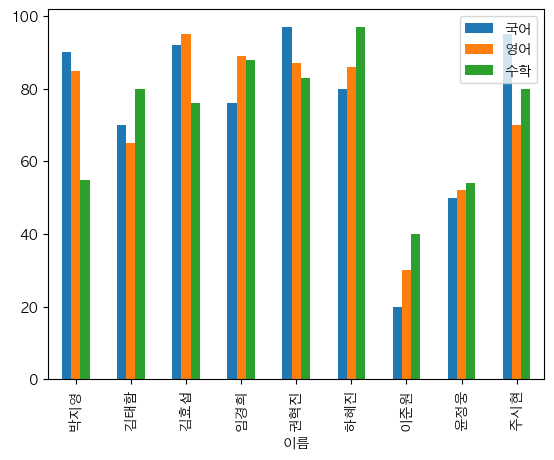

In [2]:
student=pd.read_csv('./data 4/student.csv',encoding='cp949',index_col='이름')

student.plot(kind='bar')

In [3]:
# 위 데이터의 경우 단순한 표준화 작업만으로는 성적을 비교하는것이 어려울 수 있다. 
# 단순 표준화 작업은 표준 편차를 고려하지 않을 수 있다. - 난이도를 고려하기에 표준편차가 좋다. 
# 최대값이나 최대값 - 최소값으로 나눈 데이터로는 비교하기가 어려울 수 있다. 
# 이런 경우 표준 값이나 편차 값을 구해서 비교하는 것이 좋다. 

# 평균과 표준 편차 구하기
kormean,korstd=student['국어'].mean(),student['국어'].std()
engmean,engstd=student['영어'].mean(),student['영어'].std()
matmean,matstd=student['수학'].mean(),student['수학'].std()


In [4]:
# 표준화 함수 제작
def stadardization(df,score):
    return ((df[score]-df[score].mean())/df[score].std())

# print(stadardization(student,'국어'))
def deviation(df,subject):
    standard=subject+'표준값'
    return df[standard]*10+50
# print(deviation(student,'국어'))

# 표준값 구하기
student['국어표준값']=(student['국어']-kormean)/korstd
student['영어표준값']=(student['영어']-engmean)/engstd
student['수학표준값']=(student['수학']-matmean)/matstd

# 편차값 구하기
student['국어편차값']=student['국어표준값']*10+50
student['영어편차값']=student['영어표준값']*10+50
student['수학편차값']=student['수학표준값']*10+50
student

,국어,영어,수학,국어표준값,영어표준값,수학표준값,국어편차값,영어편차값,수학편차값
이름,,,,,,,,,
박지영,90,85,55,0.616320,0.554321,-0.941716,56.163201,55.543208,40.582843
김태함,70,65,80,-0.176091,-0.386979,0.399335,48.239085,46.130213,53.993351
김효섭,92,95,76,0.695561,1.024971,0.184767,56.955613,60.249706,51.847670
임경희,76,89,88,0.061632,0.742581,0.828471,50.616320,57.425807,58.284714
권혁진,97,87,83,0.893664,0.648451,0.560261,58.936642,56.484508,55.602612
하혜진,80,86,97,0.220114,0.601386,1.311250,52.201143,56.013858,63.112497
이준원,20,30,40,-2.157120,-2.034253,-1.746346,28.428796,29.657471,32.536538
윤정웅,50,52,54,-0.968503,-0.998823,-0.995358,40.314970,40.011766,40.046423
주시현,95,70,80,0.814423,-0.151654,0.399335,58.144230,48.483462,53.993351


### 표준화

In [5]:
auto_mpg=pd.read_csv('./data 4/auto-mpg.csv',header=None)
auto_mpg.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

# horsepower 열의 자료형을 실수로 변경
# ?를 None으로 치환하고 제거한 후 자료형 변경
auto_mpg['horsepower'].replace('?',np.nan,inplace=True)
auto_mpg.dropna(subset=['horsepower'],axis=0,inplace=True)
auto_mpg['horsepower']=auto_mpg['horsepower'].astype("float")
auto_mpg


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [6]:
# horsepower 열의 표준화
# max 로 나누면 0부터 시작하지 않을 수 있다. 
auto_mpg['maxhorsepower']=auto_mpg['horsepower']/auto_mpg['horsepower'].max()
auto_mpg['minmaxhorsepower']=(auto_mpg['horsepower']-auto_mpg['horsepower'].min())/(auto_mpg['horsepower'].max()-auto_mpg['horsepower'].min())
auto_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,maxhorsepower,minmaxhorsepower
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.454215,0.317768
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.167353,0.209191
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.200000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.326087,0.157609
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.406522,0.258152
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,0.547826,0.434783
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000,1.000000


#### scikit learn에서 표준화 클래스
- `StandardScaler` : 평균이 0이 되고 표준편차가 1이 되도록 변환
    - $\frac{vector-mean}{stdev}$
    - 주성분 분석(PCA- 차원 축소를 목적으로 하는 비지도학습) 이나 성적처럼 값의 범위가 동일한 데이터를 비교하고자 할 때 사용
- `MinMaxScaler` : 최대값이 1이고 최소값이 0이 되도록 변환
    - 신경망에서 주로 이용

***⇒ 이상치가 극단적일 경우 표준편차가 영향을 많이 받는다.*** 

- `RobustScaler` : 중앙값(median) 이 0이 되고 IQR 이 1이 되도록 변환
    - 중간값과 사분위 범위를 사용하여 스케일을 조정
    - $\frac{vector-mean}{Q3-Q1}$
- `MaxAbsScaler` : 0을 기준으로 절대값이 가장 큰 수 가 1 또는 -1 이 되도록 하는 표준화
    - 절대값이 0~1이 되도록 하는 방법
    - 각 컬럼별로 절대값이 가장 큰 데이터로 나누는 방식
- `QuantileTransformer` : 데이터를 1000개의 분위로 나누어서 0~1 사이에 고르게 분포시키는 방법으로 이상치로 인한 영향을 줄여주는 방식

***특징***

- ***`StandardScaler` 와 `RobustScaler` 의 경우는 대부분 표준화된 형태의 데이터 분포로 변환***
- ***`MinMaxScaler` 는 특정 값에 집중되어 있는 데이터가 그렇지 않은 데이터 분포보다 표준편차에 의한 스케일 변화 값이 커지게 되어서 한쪽 쏠림 현상이 있는 데이터의 분포의 경우는 형태를 거의 유지한다.***
- ***`MaxAbs` 는 음수와 양수 데이터가 섞여 있는 경우 대칭 분포를 유지***
- ***스케일링을 할 때는 `outlier` 에 대해 고민해야 한다.***
- 분포에 대한 고민 - ***분포를 그대로 유지시키지 않고 모든 컬럼들의 분포를 유사하게 만드는 경우 한쪽으로 쏠린 컬럼의 데이터의 경우는 작은 변화의 차이가 아주 큰 변화를 가져올 수 있다.***

⇒ 스케일링을 하기 전에 각 컬럼의 분포를 확인한 후 스케일링하는것이 좋다. 


In [7]:
from sklearn import preprocessing
# 스케일링을 수행할 데이터를 가져오기 - 마력 데이터 
x=auto_mpg[['horsepower']].values
# print(type(x)) # ndarray

print('평균',np.mean(x))
print('std',np.std(x))
print('max',np.max(x))
print('min',np.min(x))

scaler=preprocessing.StandardScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)
x_scaled

x_scaled=scaler.fit_transform(x)

평균 104.46938775510205
std 38.44203271442593
max 230.0
min 46.0


## 3. 정규화 ( Normalize)

- 데이터의 범위를 0과 1사이로 변환하여 데이터의 분포를 조정하는것
- Scaler 는 각 컬럼의 통계 데이터를 이용해서 수행하지만 Normalizer 는 행 단위로 스케일링
- 여러가지 연관된 컬럼을 가진 데이터(텍스트) 에서 많이 사용
- Normalizer 클래스의 함수를 이용해서 수행하는데 norm 옵션에 L1을 대입하면 맨해튼거리로 계산하고 L2 를 대입하면 유클리드 거리를 이용해 수행한다.
- max 를 설정하면 가장 큰 값으로 나눈다.

In [8]:
# 행을 기준으로 정규화
features=np.array([[1,2],[2,3],[3,8],[4,2],[7,2]])
normalizer=preprocessing.Normalizer(norm='l2') # euclide distance
l2_norm=normalizer.transform(features)
l2_norm

array([[0.4472136 , 0.89442719],
       [0.5547002 , 0.83205029],
       [0.35112344, 0.93632918],
       [0.89442719, 0.4472136 ],
       [0.96152395, 0.27472113]])

In [9]:
normalizer2=preprocessing.Normalizer(norm='l1') # manhattan distance
l1_norm=normalizer2.transform(features)
l1_norm # 행간의 합이 1이다. 

array([[0.33333333, 0.66666667],
       [0.4       , 0.6       ],
       [0.27272727, 0.72727273],
       [0.66666667, 0.33333333],
       [0.77777778, 0.22222222]])

In [10]:
normalizer3=preprocessing.Normalizer(norm='max') # 큰걸로 나눈 값
l3_norm=normalizer3.transform(features)
l3_norm 

array([[0.5       , 1.        ],
       [0.66666667, 1.        ],
       [0.375     , 1.        ],
       [1.        , 0.5       ],
       [1.        , 0.28571429]])

## 다항 특성과 교차항 특성

In [11]:
# 다항과 교차항 생성
features=np.array([[1,2],[2,3],[3,8],[4,2],[7,2]])
# 제곱항 까지의 다항을 생성.- 열의 개수 증가.
# 회귀 분석을 할 때 시간의 흐름에 따라 변화가 급격하게 일어나는 경우 또는 데이터가 부족할 때 샘플데이터를 추가하기 위해서 사용한다. 
# 제곱을 하거나 곱하기를 하게 되면 데이터 특성 자체는 크게 변화하지 않기 때문에 사용한다.
polynomialer=preprocessing.PolynomialFeatures(degree=2,include_bias=True)
result=polynomialer.fit_transform(features)
result


array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  8.,  9., 24., 64.],
       [ 1.,  4.,  2., 16.,  8.,  4.],
       [ 1.,  7.,  2., 49., 14.,  4.]])

## 5. 특성 변환

In [12]:
from sklearn.compose import ColumnTransformer
features=np.array([[1,2],[2,3],[3,8],[4,2],[7,2]])

# 위의 데이터에 함수 적용
result1= preprocessing.FunctionTransformer(lambda x:x+1).transform(features)
# result1
# result=result1.fit_transform(features)
# result

df=pd.DataFrame(features,columns=['f1','f2'])
# df.apply(lambda x:x+1).values

def add_one(x):
    return x+1

def sub_one(x):
    return x-1
# 열별로 함수를 다르게 적용하게 하기. 
result2=ColumnTransformer([('add_one',preprocessing.FunctionTransformer(add_one,validate=True),['f1']),
                            ('sub',preprocessing.FunctionTransformer(lambda x:x+10,validate=True),['f2']),]).fit_transform(df)
result2

array([[ 2, 12],
       [ 3, 13],
       [ 4, 18],
       [ 5, 12],
       [ 8, 12]])

## 이산화

#### pandas 의 cut 이용
- x 옵션에 데이터를 설정
- bins 에 경계값의 list
- labels 에 각 그룹의 이름을 설정
- include_lower 에 첫 경계값 포함 여부를 설정

In [13]:
# auto_mpg 의 horsepower 를 3개의 구간으로 분할
auto_mpg['horsepower'].describe()

# 경계값 찾기
count,bin_dividers=np.histogram(auto_mpg['horsepower'],bins=3)
print(count,bin_dividers)

# 각 그룹에 할당할 값의 리스트
bin_names=['저출력','보통출력','고출력']

auto_mpg['hp_bin']=pd.cut(x=auto_mpg['horsepower'],bins=bin_dividers,labels=bin_names,include_lowest=True)
auto_mpg



[257 103  32] [ 46.         107.33333333 168.66666667 230.        ]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,maxhorsepower,minmaxhorsepower,hp_bin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0.565217,0.456522,보통출력
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0.717391,0.646739,보통출력
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,0.652174,0.565217,보통출력
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,0.652174,0.565217,보통출력
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,0.608696,0.510870,보통출력
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,0.373913,0.217391,저출력
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,0.226087,0.032609,저출력
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,0.365217,0.206522,저출력
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,0.343478,0.179348,저출력


#### Numpy 의 digitize 이용
- 첫번째 매개변수로 이산화 할 데이터
- bins에 경계값의 list 를 넣는다. - 첫번째 데이터가 첫 구간의 끝이다.
- right 에 경계값 포함 여부를 설정 - (끝값 포함 여부)

```python
# numpy 에서는 그룹의 명칭을 설정하지 않고 0,1,2 처럼 인덱스로 구분한다. 
result=np.digitize(auto_mpg['horsepower'],bins=bin_dividers[1:],right=True)
print(result)
```

In [14]:
# numpy 에서는 그룹의 명칭을 설정하지 않고 0,1,2 처럼 인덱스로 구분한다. 
result=np.digitize(auto_mpg['horsepower'],bins=bin_dividers[1:],right=True)
print(result)

[1 1 1 1 1 2 2 2 2 2 2 1 1 2 0 0 0 0 0 0 0 0 0 1 0 2 2 2 2 0 0 0 0 0 0 0 0
 1 2 1 1 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 1 1 2 0 1 1 1
 1 1 0 0 0 0 0 0 0 0 2 1 1 1 1 2 1 1 1 2 2 2 0 0 0 0 0 0 1 1 2 2 0 0 0 0 0
 0 0 0 1 2 0 0 0 1 1 1 1 2 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 2 1 1 1 0 0 0 0 0 1 1 1
 1 1 0 0 0 2 2 2 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]


#### sklearn 의 `Binarizer` 와 `KBinsDiscretizer` 클래스를 이용
- `Binarizer` : 하나의 임계값을 설정해서 0과 1ㅡ2개의 그룹으로 분할 할 때 사용
- `KBinsDiscretizer` : 여러개의 임계값을 설정해서 분할.

***옵션***

- `encoding` - `ordinal` 을 적용하면 일련번호 형태로, `onehot` 을 적용하면 *one-hot encoding*을 해서 희소 행렬로, `onehot_dense` 를 적용하면 *one-hot encoding*을 적용해 밀접행렬로 리턴
- `strategy` - `quantile` (각 구간의 개수를 유사하게) , `uniform` (구간의 크기를 유사하게) 을 설정
- 각 구간의 경계값을 알고자 하는 경우에 `bin_edges_` 속성을 호출
- sklearn 이 업데이트 되면서 속성을 직접 리턴하던 것을 함수로 변경하는 경우가 종종 있다.

In [21]:
# sklearn 의 binning( 구간 분할 )
age= np.array([[12],[13],[30],[29],[40],[60],[70]])
# 2개 그룹으로 분할
binarizer=preprocessing.Binarizer(threshold=30)
result=binarizer.transform(age)
result

# 여러개의 그룹으로 분할 
# 4개의 그룹으로 일련번호 형태로 일정한 비율로 분할
# strategy에 uniform 을 설정하면 간격을 일정하게 분할
# Encode=ordinal 이면 일련번호로 그룹이 생성
# onehot 으로 설정함녀 원핫인코딩을 하고 난 후 희소행렬로 
# onehot-dense - 밀집행렬로
kb=preprocessing.KBinsDiscretizer(4,encode='ordinal',strategy='quantile')
result=kb.fit_transform(age)

kb1=preprocessing.KBinsDiscretizer(4,encode='onehot',strategy='quantile')
result1=kb1.fit_transform(age)

kb2=preprocessing.KBinsDiscretizer(4,encode='onehot-dense',strategy='quantile')
result2=kb2.fit_transform(age)


print(result)
print('------------------')
print(result1)
print('------------------')
print(result2)

[[0.]
 [0.]
 [2.]
 [1.]
 [2.]
 [3.]
 [3.]]
------------------
  (0, 0)	1.0
  (1, 0)	1.0
  (2, 2)	1.0
  (3, 1)	1.0
  (4, 2)	1.0
  (5, 3)	1.0
  (6, 3)	1.0
------------------
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [26]:
# 군집분석을 이용한 구간 분할
from sklearn.cluster import KMeans

sample=np.array([[13,30],[30,40],[67,44],[26,24],[22,11],[98,28]])
df=pd.DataFrame(sample,columns=['f1','f2'])

cluster=KMeans(3,random_state=42)
cluster.fit(sample)
df['group']=cluster.predict(sample)
df

/Users/kimjimin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,f1,f2,group
0,13,30,0
1,30,40,0
2,67,44,2
3,26,24,0
4,22,11,0
5,98,28,1


## 이상치 감지

#### z-score 를 통해서 감지

In [35]:
# z-score 를 구해주는 함수
def outliers_z_score(ys):
	threshold=3
	mean_y=np.mean(ys)
	print("평균",mean_y)
	stdev_y=np.std(ys)
	print("std",stdev_y)
	z_score=[(y-mean_y)/stdev_y for y in ys]
	print(z_score)
	return np.where (np.abs(z_score)>threshold)

features=np.array([[10,10,7,6,3],[200000000,3,23,12,11]])
print(outliers_z_score(features))


# 데이터가 12개보다 작으면 이상치가 없다고 판단해버린다. => 표준편차가 3을 넘지 않는다. 

평균 20000008.5
std 59999997.16666691
[array([-0.33333332, -0.33333332, -0.33333337, -0.33333339, -0.33333344]), array([ 3.        , -0.33333344, -0.33333311, -0.33333329, -0.33333331])]
(array([], dtype=int64), array([], dtype=int64))


#### 보정된 zscore

In [49]:
# z-score 를 보정해서 사용하는 함수
def outliers_modified_z_score(ys):
	# 표준편차 임계값
	threshold=3.5
	# 평균 대신 중앙값 사용
	mean_y=np.median(ys)
	print("평균",mean_y)
	stdev_y=np.median([np.abs(y-mean_y) for y in ys])
	print("std",stdev_y)
	z_score=[0.6745*(y-mean_y)/stdev_y for y in ys]
	print(z_score)
	return np.where (np.abs(z_score)>threshold)

features=np.array([[10,10,7,6,3],[200000,3,23,12,11]])
print(outliers_modified_z_score(features))


# 예시 100점 4명에 0점 1명.  

평균 10.0
std 3.5
[array([ 0.        ,  0.        , -0.57814286, -0.77085714, -1.349     ]), array([ 3.85409300e+04, -1.34900000e+00,  2.50528571e+00,  3.85428571e-01,
        1.92714286e-01])]
(array([1]), array([0]))


#### IQR 이용

In [53]:
# IQR 을 이용하는 방법
def outliers_iqr(ys):
    # 1사분위수와 3사분위수 구하기
	quantile_1,quantile_3=np.percentile(ys,[25,75])
	iqr=quantile_3-quantile_1
	# 일반적인 데이터의 하한과 상한ㅇ르 구하기
	lower_bound=quantile_1-(iqr*1.5)
	upper_bound=quantile_3+(iqr*1.5)
	return np.where((ys>upper_bound) | (ys<lower_bound))
print(features)
outliers_iqr(features)

[[    10     10      7      6      3]
 [200000      3     23     12     11]]


(array([1, 1]), array([0, 2]))

#### sklearn 을 이용해 일정 비율의 데이터를 이상치로 간주

In [66]:
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

# 10행 2열의 데이터를 중앙점을 1로 해서 랜덤하게 생성
features,_=make_blobs(n_samples=10,n_features=2,centers=1,random_state=42)
# print(features)
# 첫번째 행의 데이터를 이상치로 수정. 
features[0,0]=10000
features[0,1]=10000

# 이상치 감지 객체를 생성 - 이상치 비율을 설정
outliers_detector=EllipticEnvelope(contamination=0.1)
outliers_detector.fit(features)
# 이상치로 판정되면 -1 , 그렇지 않다면 1을 리턴함. 
outliers_detector.predict(features)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

## 9. 이상치 처리 방법
- 데이터를 삭제
    - 현실적으로 거의 발생하기 힘든 데이터인 경우
- 이상치로 표시하고 이를 특성의 하나로 포함
    - 최근 날씨의 경우 , 기온 - *기온이상* 이라는 특성을 추가한다.
- 이상치의 영향이 줄어들도록 특성을 변환 - scailing
    - 데이터의 편차를 줄이는 방법을 이용해서 이상치의 영향을 최소화 한다.
    - 이상치의 영향을 줄여야 하므로 RoburtScaler 사용을 권장한다.
    - 로그 특성 변환을 이용하는 것을 권장한다.

In [73]:
# 이상치 처리
houses=pd.DataFrame()
houses['Price']=[500000,390000,290000,5000000]
houses['Rooms']=[2,3,5,116]
houses['Feet']=[1500,2000,1300,20000]

# Rooms 값이 20 보다 크면 이상치로 간주하고 특성을 추가. 
houses['Outlier']=np.where(houses['Rooms']>20,1,0)

# Outlier의 영향을 최소화 - 특성변환 (로그 변환)
houses['Log_Feet']=[np.log(x) for x in houses['Feet']]

# outlier 영향 최소화 - 특성변환 - scailing
imsi=pd.DataFrame(houses['Rooms'])
scaler=preprocessing.RobustScaler()
scaler.fit(imsi)
houses['Scale_Rooms']=scaler.transform(imsi)
houses

,Price,Rooms,Feet,Outlier,Log_Feet,Scale_Rooms
0,500000,2,1500,0,7.313220,-0.066667
1,390000,3,2000,0,7.600902,-0.033333
2,290000,5,1300,0,7.170120,0.033333
3,5000000,116,20000,1,9.903488,3.733333


## 결측치 확인

In [76]:
import seaborn as sns

titanic=sns.load_dataset('titanic')
# titanic.info()

# NOne 의 개수 출력
print(titanic['age'].value_counts(dropna=False))

print(titanic['age'].isnull().sum(axis=0))

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: age, Length: 89, dtype: int64
177


#### 결측치 삭제

In [77]:
# 각 컬럼의 None 의 개수 파악
print(titanic.isnull().sum(axis=0))

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [90]:
# 결측치의 개수가 200개 이상인 컬럼을 제거
titanic_thresh=titanic.dropna(axis=1,thresh=200)
# print(titanic_thresh)
# print(titanic_thresh.columns)
# 열 선택해서 뽑기
result=titanic[['survived','pclass','sex','age','sibsp']]

# 결측치 인 행만 제거 - age 행이 결측치인 행을 제거 
result_age=titanic.dropna(subset=['age'],how='any',axis=0)
result_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  712 non-null    object  
 13  alive        714 non-null    object  
 14  alone        714 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 70.2+ KB


#### 결측치 대체

In [102]:
# None 을 포함하고 있는 값을 출력
# print(titanic['embark_town'][825:831])

# embark_town 컬럼의 특성이 계절성을 갖는다면 이 경우는 앞의 값으로 채우는것도 나쁘지 않은 방법이다. 
result=titanic['embark_town'].fillna(method='ffill') 
result[825:831]

# 결측치가 몇개 되지 않을 때는 대표값으로 대체
# 대표값으로 사용될 수 있는 데이터는 평균, 중간값, 최빈값 등. 
# 대표값으로 변환하는 경우 많은 양의 데이터를 변경하면 분석할 떄 결과가 왜곡 될 수 있다. 
mode=titanic['embark_town'].value_counts()
# 가장 많이 출현한 데이터로 변경
# print(mode)
titanic['embark_town'].fillna(mode.idxmax(),inplace= True)
titanic[825:831]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
825,0,3,male,NaN,0,0,6.9500,Q,Third,man,True,NaN,Queenstown,no,True
826,0,3,male,NaN,0,0,56.4958,S,Third,man,True,NaN,Southampton,no,True
827,1,2,male,1.0,0,2,37.0042,C,Second,child,False,NaN,Cherbourg,yes,False
828,1,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,yes,True
829,1,1,female,62.0,0,0,80.0000,NaN,First,woman,False,B,Southampton,yes,True
830,1,3,female,15.0,1,0,14.4542,C,Third,child,False,NaN,Cherbourg,yes,False


In [105]:
# sklearn 의 클래스를 이용
# sklearn 의 simpleImputer 이용
# 객체를 만들 때 strategy 옵션에 mean,median,most_frequent,constant 를 설정만 하면 된다. 
# constant 를 설정하면 fill_value 옵션에 채울 값을 추가해주어야 한다. 

from sklearn.impute import SimpleImputer
# 중간값으로 대체.
features=np.array([[100],[200],[300],[400],[500],[np.nan]])
simple_imputer=SimpleImputer(strategy='median')
print(simple_imputer.fit_transform(features))

[[100.]
 [200.]
 [300.]
 [400.]
 [500.]
 [300.]]


In [107]:
# from fancyimpute import KNN

# features=np.array([[100,200],[200,300],[300,800],[400,200],[700,np.nan]])
# print(KNN(k=5,verbose=0).fit_transform(features))


ModuleNotFoundError: No module named 'fancyimpute'